# Big Data Mart Sales Problem

In [138]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [139]:
#Load test data
df_test=pd.read_csv("Bigdatamart_test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [140]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [141]:
#Load train data
df_train=pd.read_csv("Bigdatamart_train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
#Check for shape of Dataframe
df_train.shape
#Rows=8523
#Columns=12

(8523, 12)

In [143]:
df_train.info()
#There are null values
#Feature data type: float64(4), int64(1), object(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [144]:
#Number of null values in features
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# EDA

<AxesSubplot:>

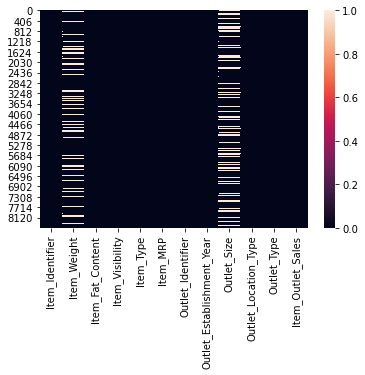

In [145]:
#Uni-variate analysis
sns.heatmap(df_train.isnull())
#Item weight & Outlet size have null values.

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

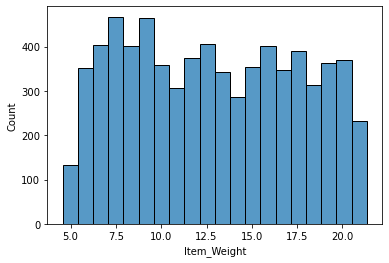

In [146]:
#1.Item weight:
#Univariate analysis:
sns.histplot(x="Item_Weight",data=df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

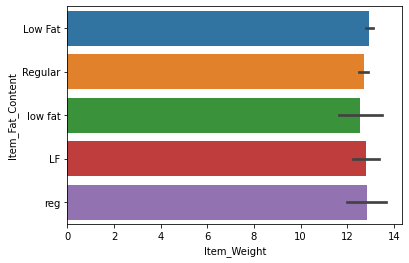

In [147]:
#Bi-variate Analyis
sns.barplot(x="Item_Weight",y="Item_Fat_Content",data=df_train)

In [148]:
#Feature "Item_fat_content" is not standardized.
#Assuming "LF" & "low fat" is same as "Low Fat"
#Assuming "reg" is same as "Regular"
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [149]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['reg'],'Regular')      

In [150]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

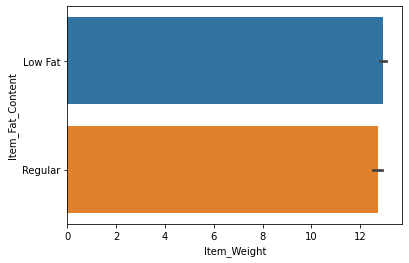

In [151]:
sns.barplot(x="Item_Weight",y="Item_Fat_Content",data=df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

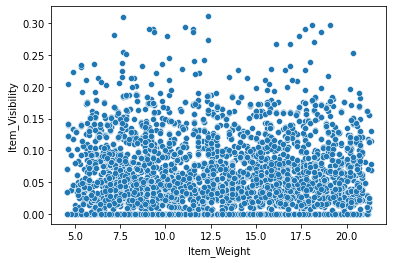

In [152]:
#Check correlation between "Item weight" & "Item visibility"
sns.scatterplot(x="Item_Weight",y="Item_Visibility",data=df_train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

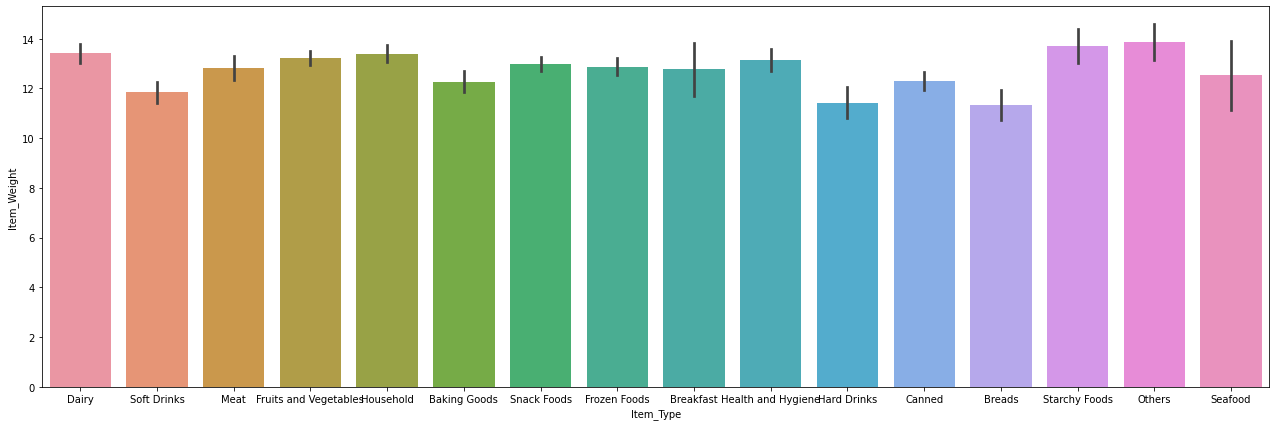

In [153]:
plt.figure(figsize=(22,7))
sns.barplot(y="Item_Weight",x="Item_Type",data=df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

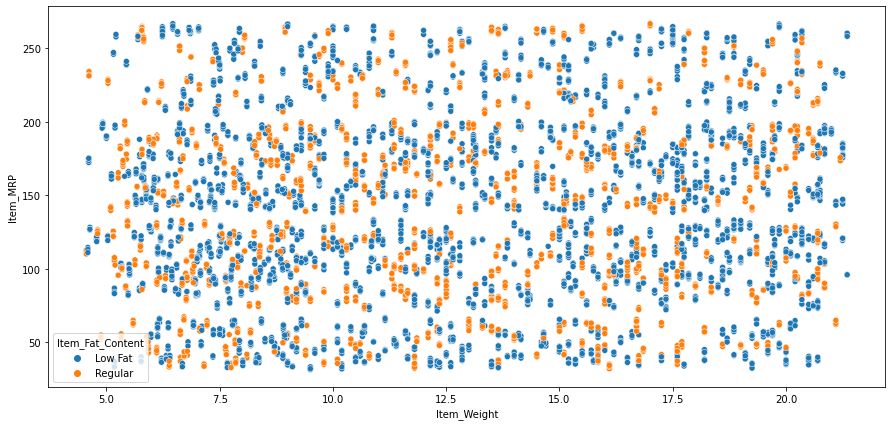

In [154]:
#Check correlation between "Item weight" & "Item MRP"
plt.figure(figsize=(15,7))
sns.scatterplot(x="Item_Weight",y="Item_MRP",data=df_train,hue="Item_Fat_Content")

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

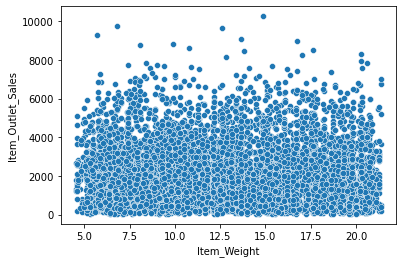

In [155]:
#Item weight vs Item_Outlet_Sales (Target Variable)
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=df_train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

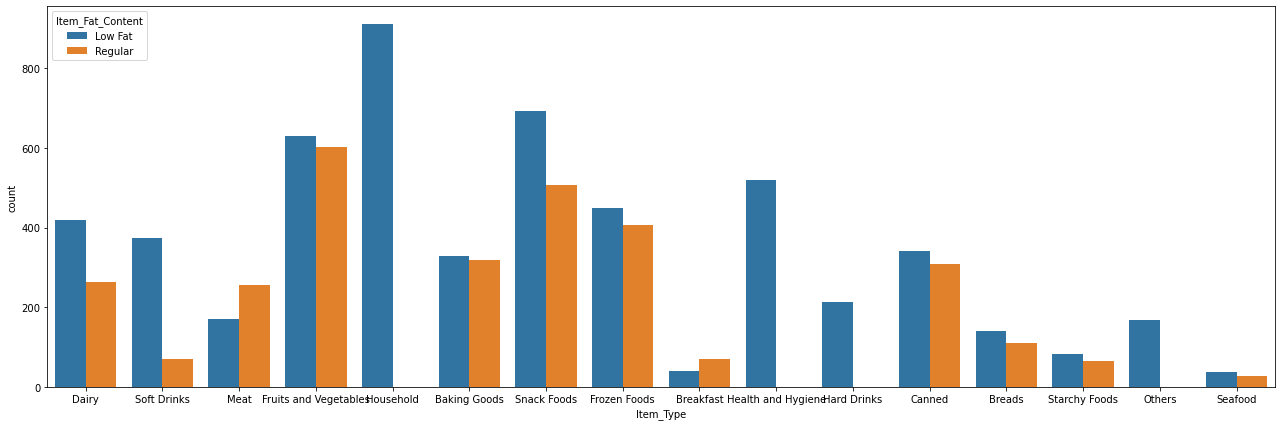

In [156]:
#2.Item Fat content
#sns.scatterplot(x="Item_Fat_Content",y="Item_Type",data=df_train)
plt.figure(figsize=(22,7))
sns.countplot(x="Item_Type",data=df_train,hue="Item_Fat_Content")

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

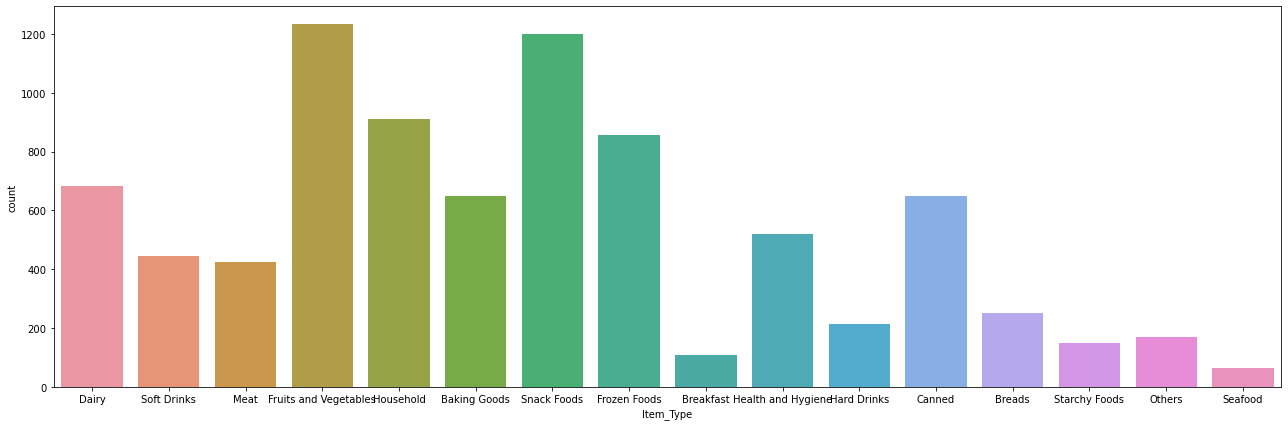

In [157]:
#"Item Type" sales distribution by count.
plt.figure(figsize=(22,7))
sns.countplot(x="Item_Type",data=df_train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

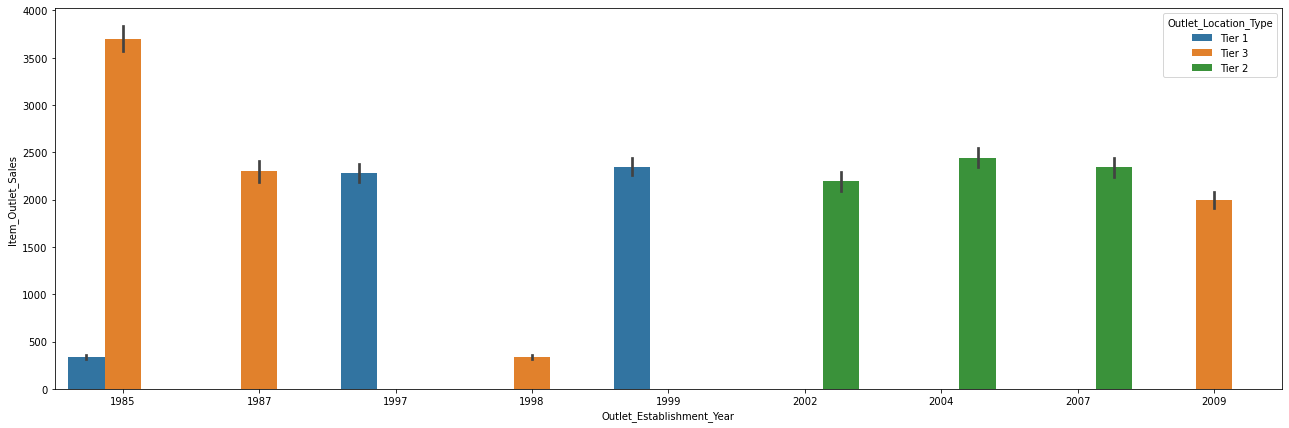

In [158]:
plt.figure(figsize=(22,7))
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df_train,hue="Outlet_Location_Type")

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

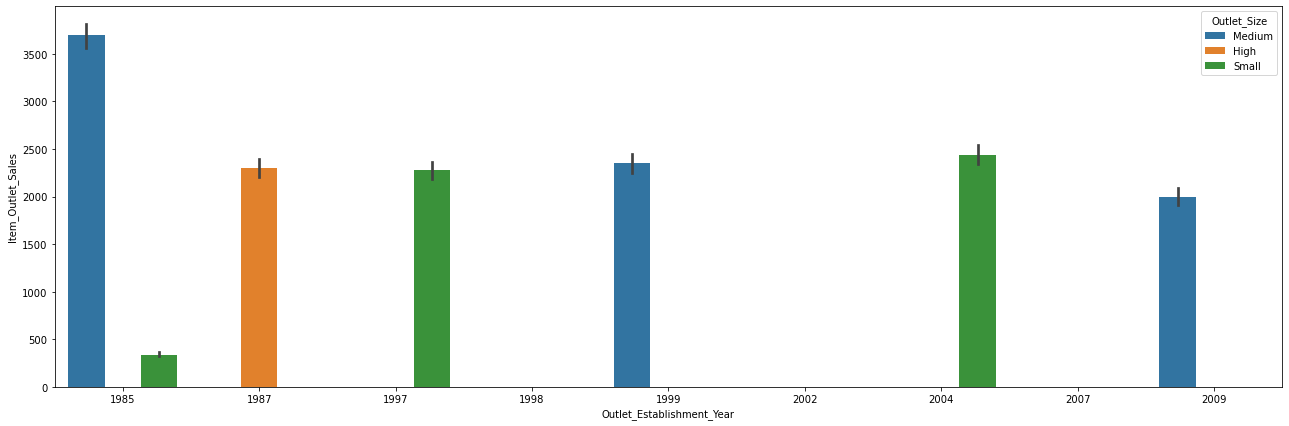

In [159]:
plt.figure(figsize=(22,7))
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df_train,hue="Outlet_Size")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

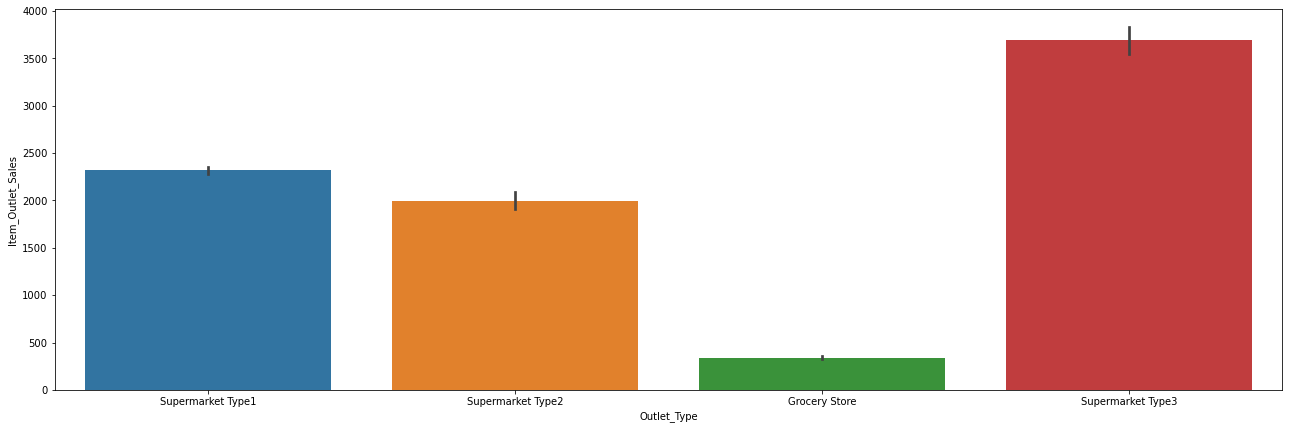

In [160]:
plt.figure(figsize=(22,7))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df_train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

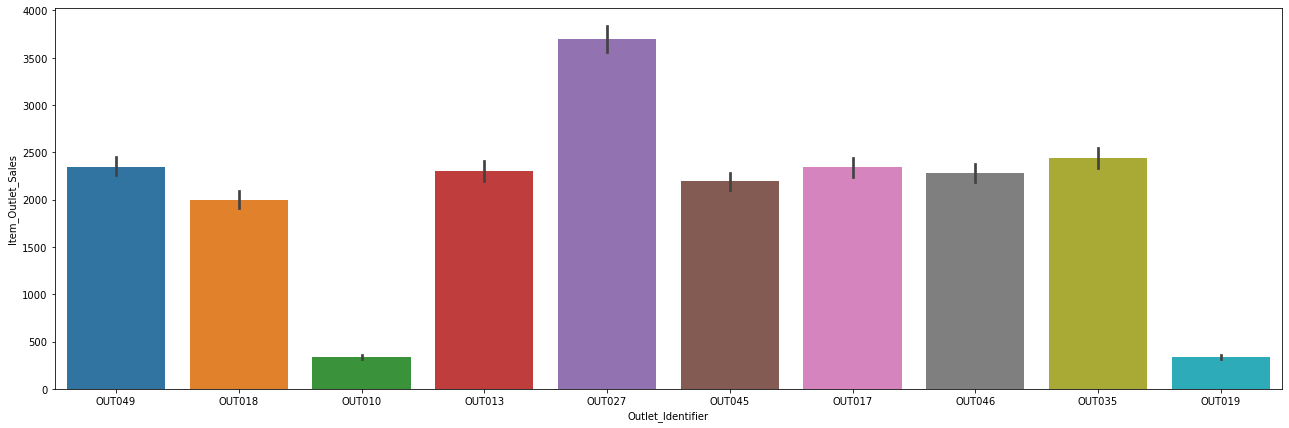

In [161]:
plt.figure(figsize=(22,7))
sns.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=df_train)

# Data Pre-processing

In [162]:
#Pre processing of Model Train data
#Handle null values in dataset

In [163]:
#Replace NaN values in feature "Outlet Size"
df_train["Outlet_Size"]=df_train["Outlet_Size"].replace(np.nan,"Small")

In [164]:
#Cross check null values
df_train["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [165]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [166]:
#Handle null values from Item_Weight with mean
df_train["Item_Weight"]=df_train["Item_Weight"].replace(np.nan,df_train["Item_Weight"].mean())

In [167]:
#No null values found
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [168]:
#From column Outlet Establishment year, years of operation can be determined
df_train["Outlet_Operating_Years"]=2021- df_train["Outlet_Establishment_Year"]
df_train["Outlet_Operating_Years"]

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_Operating_Years, Length: 8523, dtype: int64

<AxesSubplot:xlabel='Outlet_Operating_Years', ylabel='Item_Outlet_Sales'>

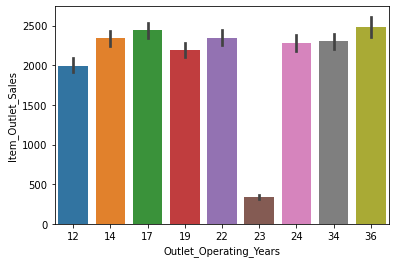

In [169]:
#Relation between Outlet_Operating_Years & Item_Outlet_Sales
sns.barplot(x="Outlet_Operating_Years",y="Item_Outlet_Sales",data=df_train)

In [170]:
#Column Item Identifier,Outlet Identifier,Outlet Establishment year can be dropped
df_train=df_train.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"])

In [171]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operating_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34


In [172]:
df_train.shape

(8523, 10)

In [173]:
#Dividing data into independent & dependent variables
df_x=df_train.drop(columns="Item_Outlet_Sales")
y_train=df_train["Item_Outlet_Sales"]
print(df_x.shape,y_train.shape)

(8523, 9) (8523,)


In [174]:
#Data Encoding
#Convert the input into integers using get_dummies
ds_x=pd.get_dummies(df_x)
print(ds_x.shape)

(8523, 32)


In [175]:
#Dataset after applying One Hot Encoder
ds_x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Operating_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,22,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,12,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,22,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,23,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,34,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [176]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(ds_x)
x=sc.transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [177]:
#Check shape
x.shape

(8523, 32)

In [185]:
from sklearn.decomposition import PCA
pca=PCA(n_components=25)
pc_train=pca.fit_transform(x)

#Check information retained in data after dimensionality reduction
sum(pca.explained_variance_ratio_)

0.9956106174517401

In [186]:
#Data dimensions for training
print(pc_train.shape,y_train.shape)

(8523, 25) (8523,)


In [187]:
#Pre-processing of Test data

In [189]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [190]:
df_test.shape

(5681, 11)

In [191]:
#Column Item Fat COntent is not standardized
df_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [192]:
#Replace "low fat" & "LF" as Low Fat
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
#Replace "reg" as "Regular"
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['reg'],'Regular')      

In [193]:
df_test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [194]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [195]:
#Handle null values from Item_Weight with mean
df_test["Item_Weight"]=df_test["Item_Weight"].replace(np.nan,df_test["Item_Weight"].mean())

In [196]:
#Handle null values in "Outlet Size"
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [197]:
#Replace NaN values in feature "Outlet Size"
df_test["Outlet_Size"]=df_test["Outlet_Size"].replace(np.nan,"Small")

In [198]:
#Check null values
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [199]:
#From column Outlet Establishment year, years of operation can be determined
df_test["Outlet_Operating_Years"]=2021- df_test["Outlet_Establishment_Year"]
df_test["Outlet_Operating_Years"]

0       22
1       14
2       23
3       14
4       36
        ..
5676    24
5677    12
5678    19
5679    14
5680    19
Name: Outlet_Operating_Years, Length: 5681, dtype: int64

In [203]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Operating_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,24
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,12
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,19
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,14


In [204]:
#Column Item Identifier can be dropped
df_test=df_test.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"])

In [205]:
#Check shape
df_test.shape

(5681, 9)

In [206]:
#Data Encoding
#Convert the input into integers using get_dummies
ds_xtest=pd.get_dummies(df_test)
print(ds_xtest.shape)

(5681, 32)


In [207]:
from sklearn.decomposition import PCA
pca=PCA(n_components=25)
pc_test=pca.fit_transform(ds_xtest)

#Check information retained in data after dimensionality reduction
sum(pca.explained_variance_ratio_)

0.9999990337552768

In [208]:
#Training data
print(pc_train.shape,y_train.shape)

(8523, 25) (8523,)


In [209]:
#Testing data
print(pc_test.shape)

(5681, 25)


# Check best random state 

In [210]:
#Check best random state: Considering r2 metrics
#User-defined function to find r2 score:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [221]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",cv.mean())
    print(cv)

# 1.Decision Tree Regressor

In [217]:
#Decision tree regressor
#Hyper parameter tuning 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "max_features":["auto","log2","sqrt",None]
           }
dt_rgr=DecisionTreeRegressor()
rgr = GridSearchCV(dt_rgr, parameters, cv=5)
rgr.fit(pc_train,y_train)
rgr.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [218]:
#Decision tree regressor
dtr=DecisionTreeRegressor(max_depth=9,max_features='auto',min_samples_leaf=6,splitter='random')
r_state=maxr2_score(dtr,pc_train,y_train)

max r2 score corresponding to  72  is  0.5492732720347876


In [222]:
#Cross validation (Decision tree)
cross_val(dtr,pc_train,y_train)

Mean r2 score for regressor:  0.4898782494433761
[0.48954133 0.48017143 0.47044242 0.48544417 0.5237919 ]


# 2.KNN Regressor

In [223]:
#By hyper parameter tuning we will find the optimal value of n_neigbors using grid search
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
rgr = GridSearchCV(knr, parameters, cv=10)
rgr.fit(pc_train,y_train)
rgr.best_params_

{'n_neighbors': 9}

In [224]:
#Lets use n_neighbors as found above and use maxr2_score function
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,pc_train,y_train)

max r2 score corresponding to  85  is  0.5161596031187512


In [225]:
#Cross validation (KNN)
cross_val(knr,pc_train,y_train)

Mean r2 score for regressor:  0.4839549755951892
[0.49435488 0.45716523 0.4668813  0.4776289  0.52374458]


# 3.Support Vector Regressor

In [235]:
# Parameters for tuning for SVR
from sklearn.svm import SVR
svr=SVR()
parameters = [{'kernel': ['linear','poly','rbf'],
              'C': [1, 10]}]
               
rgr = GridSearchCV(svr, parameters, cv = 5)
rgr.fit(pc_train, y_train)
rgr.best_params_

{'C': 10, 'kernel': 'linear'}

In [236]:
#Support Vector Regressor
svr=SVR(kernel="linear",C=10)
maxr2_score(svr,pc_train,y_train)

max r2 score corresponding to  76  is  0.5694255372923176


76

In [237]:
#Cross validation (SVR)
cross_val(svr,pc_train,y_train)

Mean r2 score for regressor:  0.5464175106075703
[0.54985232 0.54363393 0.54207437 0.54913095 0.54739598]


# 4.Random Forest Regressor

In [239]:
#Hyper tuning random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100]}
rgr = GridSearchCV(rfr,parameters,cv=5)
rgr.fit(pc_train,y_train)
rgr.best_params_

{'n_estimators': 100}

In [240]:
#Random forest regressor
rfr=RandomForestRegressor(n_estimators=100)
r_state=maxr2_score(rfr,pc_train,y_train)

max r2 score corresponding to  72  is  0.5784873766205314


In [241]:
#Cross validation (Random Forest Regressor)
cross_val(rfr,pc_train,y_train)

Mean r2 score for regressor:  0.541802515417236
[0.56451707 0.512112   0.51444537 0.55302683 0.5649113 ]


# 5. Adaboost Regressor

In [243]:
#Hyper tuning of Adaboost regressor using Random search CV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
parameters= { 'n_estimators': [50, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss':['linear', 'square', 'exponential']}
rgr = RandomizedSearchCV(AdaBoostRegressor(),param_distributions=parameters ,cv=3,n_iter=5,n_jobs=-1)
rgr.fit(pc_train,y_train)
rgr.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.05}

In [244]:
#AdaBoost regresror
adr=AdaBoostRegressor(n_estimators=50,loss="linear",learning_rate=0.05)
maxr2_score(adr,pc_train,y_train)

max r2 score corresponding to  85  is  0.47095423762917965


85

In [245]:
#Cross validation (Adaboost Regressor)
cross_val(adr,pc_train,y_train)

Mean r2 score for regressor:  0.43722130630744865
[0.4592222  0.42587243 0.40515877 0.44916829 0.44668486]


In [246]:
#Results:
result=pd.DataFrame({"Classifier Model":["Decision Tree","K-Nearest Neighbour","Support Vector Regressor",
                                         "Random Forest","AdaBoost"],
                     "Random State":[72,85,76,72,85],
                     "R2 Score":[0.5493,0.5161,0.5694,0.5785,0.4709],
                    "Cross Validation":[0.4898,0.4839,0.5464,0.5418,0.4372]})
result["Difference"]=result["R2 Score"]-result["Cross Validation"]
result

,Classifier Model,Random State,R2 Score,Cross Validation,Difference
0,Decision Tree,72,0.5493,0.4898,0.0595
1,K-Nearest Neighbour,85,0.5161,0.4839,0.0322
2,Support Vector Regressor,76,0.5694,0.5464,0.0230
3,Random Forest,72,0.5785,0.5418,0.0367
4,AdaBoost,85,0.4709,0.4372,0.0337


#  Support Vector  regressor is best model

In [247]:
#SVR is best model and will be saved
# Random state= 76
# Parameter={'C': 10, 'kernel': 'linear'}
from sklearn.metrics import mean_squared_error,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(pc_train,y_train,test_size=0.2,random_state=76)
svr=SVR(kernel="linear",C=10)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.5694255372923176
RMSE= 1109.5985152685632
Mean abs error= 797.1736513798327


In [248]:
sales_prediction=svr.predict(pc_test)
print(sales_prediction)

[-1433.60321919 -1925.58864038 10014.4628575  ...   602.64403489
  7397.26412942 -2897.20009918]


In [250]:
#Convert to Dataframe
sales_prediction=pd.DataFrame(sales_prediction,columns=["Item_Outlet_Sales"])

In [251]:
#Save the predictions
sales_prediction.to_csv("Item_Outlet_Sales_Predictions.csv",index=False)